Analise de dados acidente titanic

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re as re

### Load in the train datasets

In [ ]:
dataset = pd.read_csv('titanic.data')
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dataset.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# EDA

In [ ]:
print('Classes e quantidade:', Counter(dataset['Survived']))

Classes e quantidade: Counter({0: 549, 1: 342})


<Axes: >

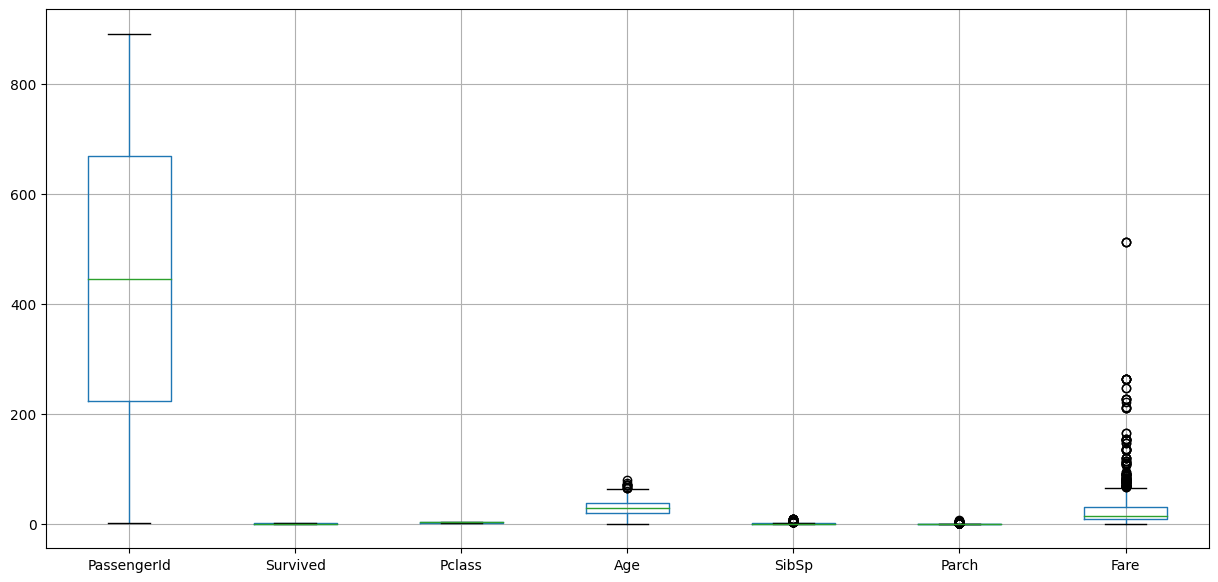

In [ ]:
dataset.boxplot(figsize=(15,7))

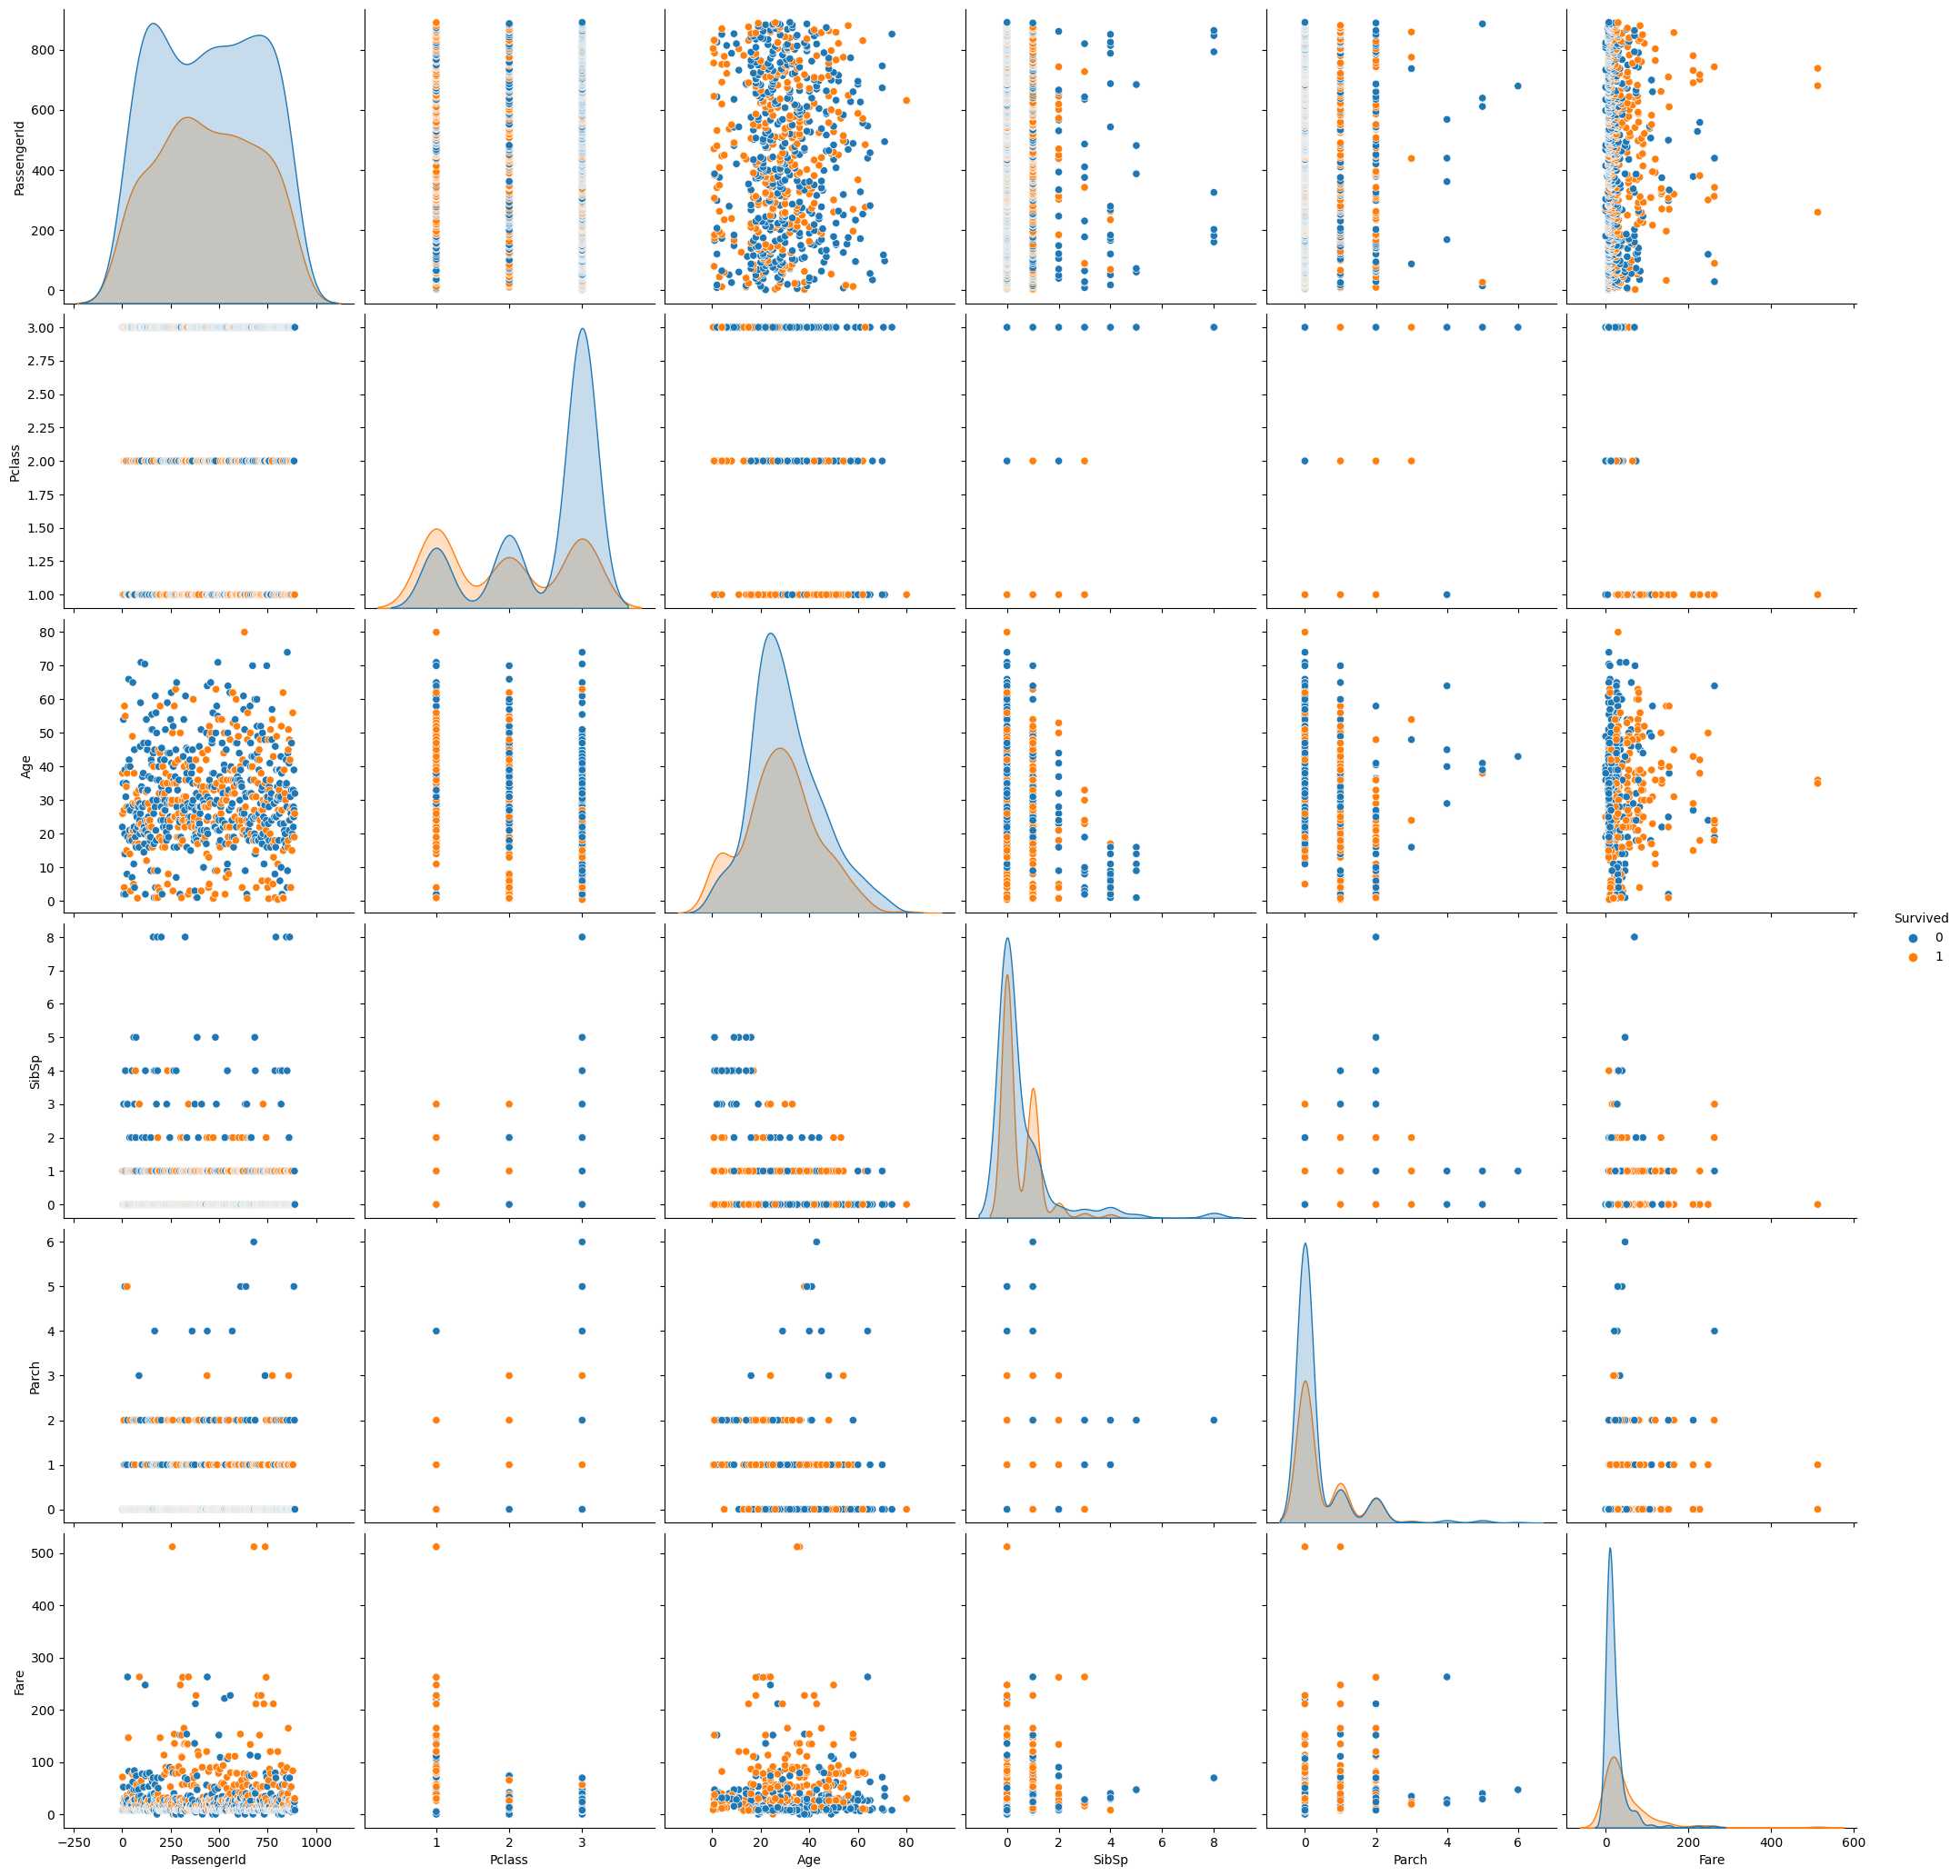

In [ ]:
sns.pairplot(dataset, hue='Survived', height=3.5)

plt.show()



Matriz de correlação: 


<ipython-input-45-6340ba0b92ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation = dataset.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


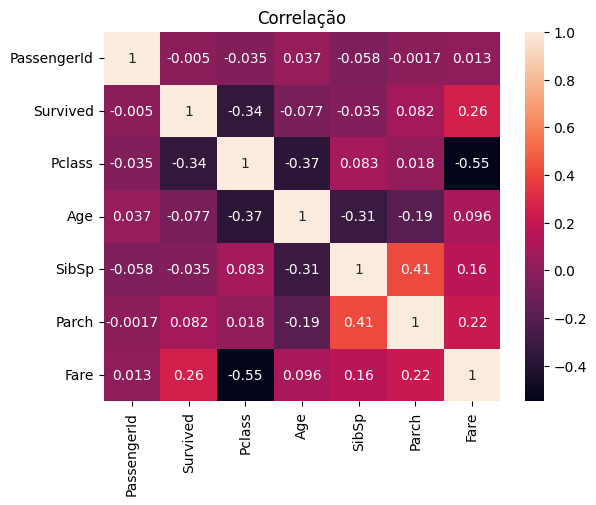

In [ ]:

df_correlation = dataset.corr()

print('\n\nMatriz de correlação: ')
display(df_correlation)

sns.heatmap(df_correlation,
            annot=True,
            xticklabels=df_correlation.columns,
            yticklabels=df_correlation.columns)

plt.title('Correlação')
plt.show()

# Feature Engineering

## Pclass

In [ ]:
dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
pd.crosstab(dataset.Pclass, dataset.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Pclass 1 and 2 have similar values for survived

## Sex

In [ ]:
dataset[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


## SibSp and Parch

In [ ]:
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [ ]:
dataset['IsAlone'] = 0
dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
dataset[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


## Fare

In [ ]:
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())
dataset['Fgroup'] = pd.qcut(dataset['Fare'], 10, labels=range(10))
dataset[['Fgroup', 'Survived']].groupby(['Fgroup'], as_index=False).mean()

,Fgroup,Survived
0,0,0.141304
1,1,0.298851
2,2,0.179245
3,3,0.230769
4,4,0.428571
5,5,0.420455
6,6,0.516854
7,7,0.373626
8,8,0.528090
9,9,0.758621


## Name

In [ ]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ''


dataset['Title'] = dataset['Name'].apply(get_title)
pd.crosstab(dataset['Title'], dataset['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [ ]:
def get_initial_name(name):
    initial_search = re.search('([A-Za-z]+)', name)
    if initial_search:
        return initial_search.group(1)
    return ''


dataset['LastName'] = dataset['Name'].apply(get_initial_name)
dataset['NumName'] = dataset['LastName'].factorize()[0]

dataset[['NumName', 'Survived']].groupby(['NumName'], as_index=False).mean()

,NumName,Survived
0,0,0.0
1,1,1.0
2,2,1.0
3,3,0.5
4,4,0.5
...,...,...
647,647,0.0
648,648,0.0
649,649,0.0
650,650,1.0


## Age

In [ ]:
print('Oldest Passenger was', dataset['Age'].max(), 'Years')
print('Youngest Passenger was', dataset['Age'].min(), 'Years')
print('Average Age on the ship was', int(dataset['Age'].mean()), 'Years')

Oldest Passenger was 80.0 Years
Youngest Passenger was 0.42 Years
Average Age on the ship was 29 Years


In [ ]:
dataset.groupby('Title').agg({'Age': ['mean', 'count']})

Age      
               mean count
Title                    
Capt      70.000000     1
Col       58.000000     2
Countess  33.000000     1
Don       40.000000     1
Dr        42.000000     6
Jonkheer  38.000000     1
Lady      48.000000     1
Major     48.500000     2
Master     4.574167    36
Miss      21.773973   146
Mlle      24.000000     2
Mme       24.000000     1
Mr        32.368090   398
Mrs       35.898148   108
Ms        28.000000     1
Rev       43.166667     6
Sir       49.000000     1

In [ ]:
dataset = dataset.reset_index(drop=True)
dataset['Age'] = dataset.groupby('Title')['Age'].apply(lambda x: x.fillna(x.mean()))

<ipython-input-59-c9ba4dec742c>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dataset['Age'] = dataset.groupby('Title')['Age'].apply(lambda x: x.fillna(x.mean()))


In [ ]:
dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer', 'Lady',
                                             'Major', 'Master',  'Miss'  ,'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],
                                            ['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected', 'Mr', 'Nobles',
                                             'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'])
dataset['Title'] = dataset['Title'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'], [4, 4, 2, 5, 6, 3, 1])

In [ ]:
dataset['TempAgroup'] = pd.qcut(dataset['Age'], 10)

dataset[['TempAgroup', 'Survived']].groupby(['TempAgroup'], as_index=False).mean()

,TempAgroup,Survived
0,"(0.419, 16.0]",0.548077
1,"(16.0, 20.0]",0.341772
2,"(20.0, 22.0]",0.431818
3,"(22.0, 26.0]",0.363636
4,"(26.0, 30.0]",0.400000
5,"(30.0, 32.368]",0.198718
6,"(32.368, 34.0]",0.406250
7,"(34.0, 38.0]",0.552632
8,"(38.0, 47.0]",0.325843
9,"(47.0, 80.0]",0.415730


In [ ]:
dataset['Agroup'] = pd.qcut(dataset['Age'], 10, labels=range(10))
dataset[['Agroup', 'Survived']].groupby(['Agroup'], as_index=False).mean()

,Agroup,Survived
0,0,0.548077
1,1,0.341772
2,2,0.431818
3,3,0.363636
4,4,0.400000
5,5,0.198718
6,6,0.406250
7,7,0.552632
8,8,0.325843
9,9,0.415730


In [ ]:
pd.crosstab(dataset.Pclass, dataset.Agroup, margins=True)

Agroup,0,1,2,3,4,5,6,7,8,9,All
Pclass,,,,,,,,,,,
1,9,12,9,15,17,27,5,35,33,54,216
2,21,14,8,26,29,18,15,13,19,21,184
3,74,53,71,47,44,111,12,28,37,14,491
All,104,79,88,88,90,156,32,76,89,89,891


In [ ]:
dataset.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Fgroup,Title,LastName,NumName,TempAgroup,Agroup
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,889,891.000000,891.000000,891.0,891.000000,891,891.000000,891,891.0
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN,NaN,10.0,NaN,652,NaN,10,10.0
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,NaN,NaN,2.0,NaN,O,NaN,"(30.0, 32.368]",5.0
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN,NaN,106.0,NaN,9,NaN,156,156.0
mean,446.000000,0.383838,2.308642,NaN,NaN,29.754659,0.523008,0.381594,NaN,32.204208,NaN,NaN,1.904602,0.602694,NaN,2.955107,NaN,285.885522,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.277179,1.102743,0.806057,NaN,49.693429,NaN,NaN,1.613459,0.489615,NaN,1.222543,NaN,190.753846,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,1.000000,0.000000,NaN,1.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,21.773973,0.000000,0.000000,NaN,7.910400,NaN,NaN,1.000000,0.000000,NaN,2.000000,NaN,117.500000,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,30.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,1.000000,1.000000,NaN,2.000000,NaN,265.000000,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.898148,1.000000,0.000000,NaN,31.000000,NaN,NaN,2.000000,1.000000,NaN,4.000000,NaN,444.500000,NaN,NaN
